In [8]:
import spacy

In [9]:
nlp = spacy.load('en')

In [10]:
import sqlite3
import pandas as pd
import datetime
from textblob import TextBlob

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [12]:
conn = sqlite3.connect('chat.db')
c = conn.cursor()

In [13]:
cmd2 = 'SELECT ROWID, text, handle_id, \
            datetime(date + strftime(\'%s\',\'2001-01-01\'), \'unixepoch\') as date_utc \
            FROM message T1 \
            INNER JOIN chat_message_join T2 \
                ON T1.ROWID=T2.message_id \
                AND T1.is_from_me=1\
            ORDER BY T2.chat_ID, T1.date'
c.execute(cmd2)
all_msg = pd.DataFrame(c.fetchall(), columns=['id','text','sender','time'])

In [14]:
all_msg.time = pd.to_datetime(all_msg.time)
#cutting to just 2017
twentyseventeen_msg = all_msg[all_msg.time.dt.year == 2017]
all_msg_clean = all_msg[all_msg.time.dt.year > 2015]

## iMessages over time

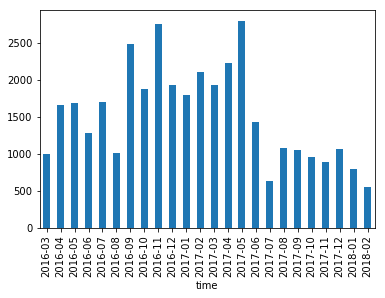

In [15]:
all_msg_clean['id'].groupby(all_msg_clean.time.dt.to_period('M')).count().plot(kind='bar')

In [16]:
all_msg_clean = all_msg_clean.assign(polarity=pd.Series([TextBlob(text).sentiment.polarity for text in twentyseventeen_msg['text']]))
all_msg_clean = all_msg_clean.assign(subjectivity=pd.Series([TextBlob(text).sentiment.subjectivity for text in twentyseventeen_msg['text']]))

## Polarity Sentiment

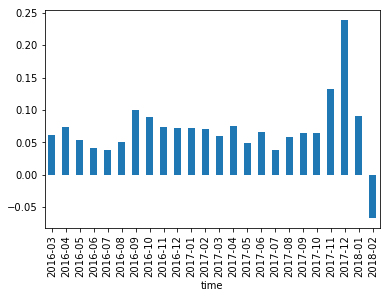

In [17]:
all_msg_clean['polarity'].groupby(all_msg_clean.time.dt.to_period('M')).mean().plot(kind='bar')

looks like I am on the whole more positive but that I had a real upswing in december but february isn't looking so good

## Subjectivity Sentiment

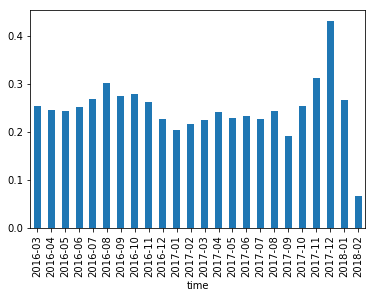

In [18]:
all_msg_clean['subjectivity'].groupby(all_msg_clean.time.dt.to_period('M')).mean().plot(kind='bar')

not sure what to make of this, looks like I have a pretty steady average of speaking from a subjective position (I feel, I think, etc.), I'd need to compare to other people to get a feel for what this means

## Using Spacy

In [19]:
text_models = [nlp(text) for text in all_msg_clean['text'] ]

In [20]:
# for model in text_models:    
#     for token in model:
#         print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#               token.shape_, token.is_alpha, token.is_stop)

In [21]:
from spacy.symbols import nsubj, VERB
verbs = []
for model in text_models:
    for possible_verb in model:
        if possible_verb.pos == VERB:
            for possible_subject in possible_verb.children:
                if possible_subject.dep == nsubj:
                    verbs.append(possible_verb)
                    break
len(verbs)

33728

In [22]:
from spacy.symbols import NOUN
nouns = []
for model in text_models:
    for possible_noun in model:
        if possible_noun.pos == NOUN:
            nouns.append(possible_noun)
            break
len(nouns)

22934

In [23]:
from spacy.symbols import ADJ
adjectives = []
for model in text_models:
    for possible_adjective in model:
        if possible_adjective.pos == ADJ:
            adjectives.append(possible_adjective)
            break
len(adjectives)

16149

In [24]:
from spacy.symbols import ADV
adverbs = []
for model in text_models:
    for possible_adverb in model:
        if possible_adverb.pos == ADV:
            adverbs.append(possible_adverb)
            break
len(adverbs)

14820

In [25]:
from spacy.symbols import ADP
prepositions = []
for model in text_models:
    for possible_preposition in model:
        if possible_preposition.pos == ADP:
            prepositions.append(possible_preposition)
            break
len(prepositions)

14634

In [26]:
import random
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string

'my papers '

In [27]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'better one be diamanda '

In [28]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

"all vacationwhat 'm omelette"

In [29]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'my thing understand anime'

In [30]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'coolthotrueget course '

In [31]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'better narc homonormative is minutes '

In [32]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'their bed such love what'

In [33]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'my 🙌my am media '

In [34]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'good post nice said what'

In [35]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'more syd fake said hand '

In [36]:
print(random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string)


our apocalypsearbor wait curry
such place myis nothing 
that tomorrowblack was gogo 
negative sleep my regret nightmare 
famous noonabout is joke 
my someone weird have cheese 
same invader my 'm thanks 
vga collegeyale think omg 
infomercial chairs bad moving pizzas
yah taco loud moving couple 


In [41]:
def textGenerate():
    print(random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + '\n' + ' ' + 
    random.sample(adjectives,1)[0].string + ' ' + random.sample(nouns,1)[0].string + ' ' + random.sample(adjectives,1)[0].string + ' ' + random.sample(verbs,1)[0].string + ' ' + random.sample(nouns,1)[0].string)


In [42]:
c = 0
while c < 50:
    textGenerate()
    c = c+1

full  beach  awful  was  person  
 unmissable  mom  fuck  want  leader 
 wanna  camera okay  accepted  https://twitter.com/webster/status/906346071210778625 
 fancy  bumb  sure  figure  matter 
 long  dinner his ’m  education  
 my  tomorrow  french  are  http://17.performa-arts.org/events/kelly-nipper 
 her  show  weird  spoofs  article  
 fun tree  sick  shows  drink  
 that  day  blank  's  driver  
 new  https://twitter.com/pixelatedboat/status/949100087350710272 cool  wondering  pizza
happy  puck  what  is  work  
 my  degrees  omg  set  swimming  
 experimental  taxi more  seeing  box  
 my  tuxedo  more  is  time  
 all  soho our  feeling  one  
 upset  home  my  keep  friends  
 my  edmond overwhelming  felt  zach  
 good kind  cool 'm  touch  
 social  dog cheaper come  sooooon 
 worst  keys  your  modified  kachka 
all  🙃 indulgant  seems  dog 
 better  lungs  my  heading  mood 
 sure  obama  https://twitter.com/6rande/status/835755561614475264 's  bod 
 only  ace  piff  'm  